![Parked car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries, insurance is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance has requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to use simple Logistic Regression, identifying the single feature that results in the best-performing model, as measured by accuracy.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table (below) detailing the column names and descriptions below.

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

Installing naniar [1.0.0] ...
	OK [linked cache]


Rows: 10000 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): id, age, gender, race, driving_experience, education, income, cred...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10,000
Columns: 19
$ id                  <dbl> 569520, 750365, 199901, 478866, 731664, 877557, 93…
$ age                 <dbl> 3, 0, 0, 0, 1, 2, 3, 1, 2, 2, 3, 3, 2, 0, 1, 1, 3,…
$ gender              <dbl> 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,…
$ race                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ driving_experience  <dbl> 0, 0, 0, 0, 1, 2, 3, 0, 2, 0, 3, 3, 2, 0, 1, 0, 3,…
$ education           <dbl> 2, 0, 2, 3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3,…
$ income              <dbl> 3, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3,…
$ credit_score        <dbl> 0.6290273, 0.3577571, 0.4931458, 0.2060129, 0.3883…
$ vehicle_ownership   <dbl> 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,…
$ vehicle_year        <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,…
$ married             <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,…
$ children            <dbl> 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,…
$ postal_code  

[1] "--------------------------------------------------"

       id              age           gender           race       
 Min.   :   101   Min.   :0.00   Min.   :0.000   Min.   :0.0000  
 1st Qu.:249638   1st Qu.:1.00   1st Qu.:0.000   1st Qu.:1.0000  
 Median :501777   Median :1.00   Median :0.000   Median :1.0000  
 Mean   :500522   Mean   :1.49   Mean   :0.499   Mean   :0.9012  
 3rd Qu.:753974   3rd Qu.:2.00   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :999976   Max.   :3.00   Max.   :1.000   Max.   :1.0000  
                                                                 
 driving_experience   education        income     credit_score   
 Min.   :0.000      Min.   :0.00   Min.   :0.0   Min.   :0.0534  
 1st Qu.:0.000      1st Qu.:2.00   1st Qu.:1.0   1st Qu.:0.4172  
 Median :1.000      Median :2.00   Median :2.0   Median :0.5250  
 Mean   :1.069      Mean   :2.01   Mean   :1.9   Mean   :0.5158  
 3rd Qu.:2.000      3rd Qu.:3.00   3rd Qu.:3.0   3rd Qu.:0.6183  
 Max.   :3.000      Max.   :3.00   Max.   :3.0   Max.   :0.9608  
          

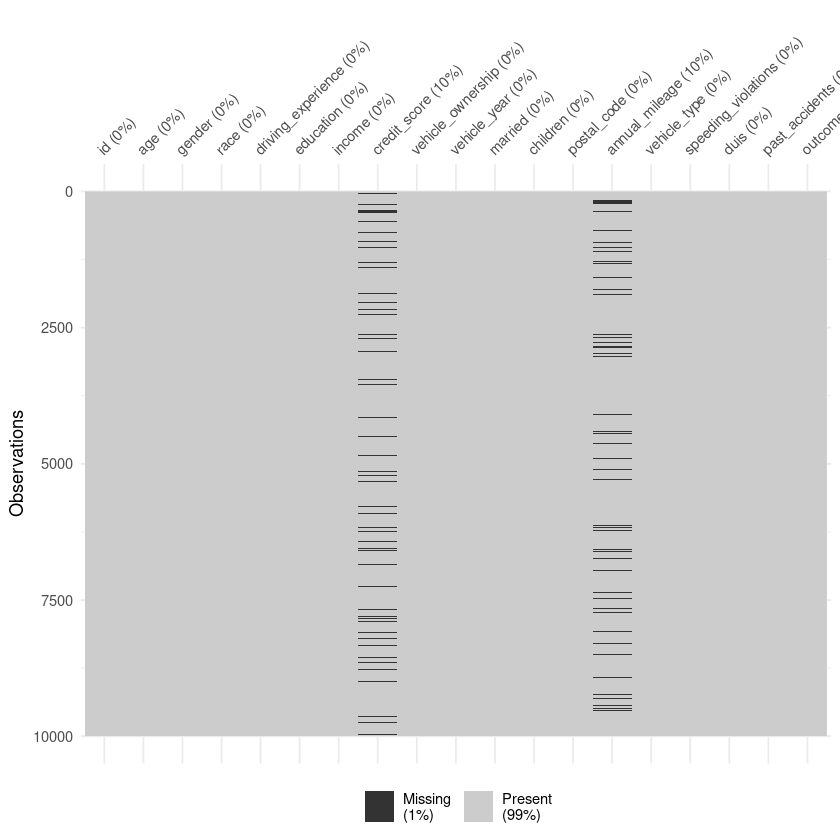

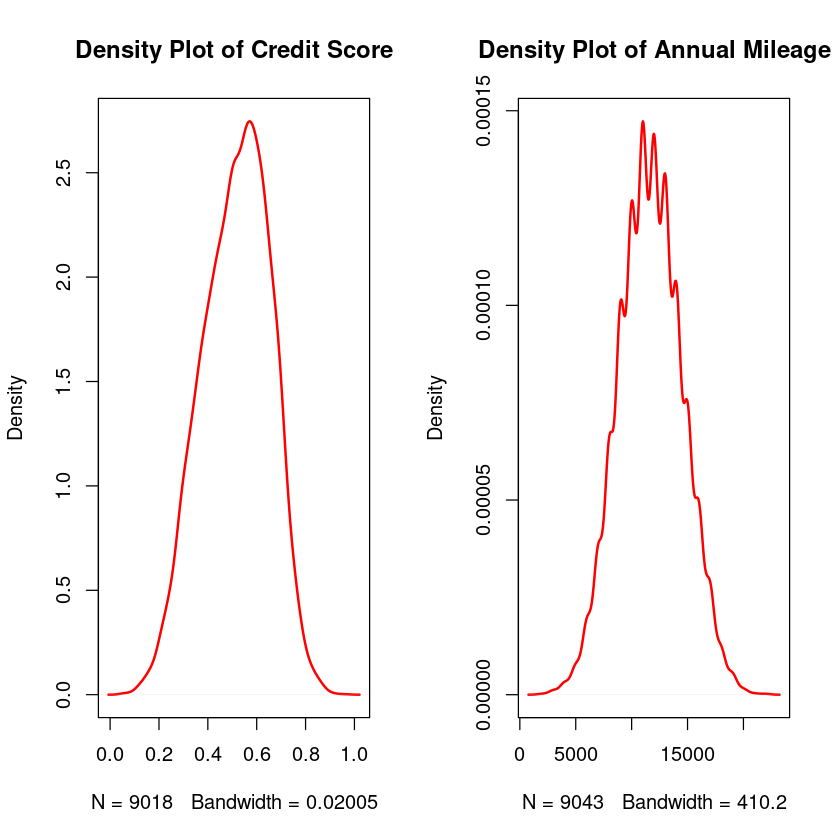

In [11]:
# Import required libraries
library(readr, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(glue, quietly = TRUE)
library(yardstick, quietly = TRUE)
install.packages("naniar")
library(naniar, quietly = TRUE)

# Start coding!

# Read in and explore the dataset

car_insurance <- read_csv("car_insurance.csv")

glimpse(car_insurance)

paste0("--------------------------------------------------")

summary(car_insurance)

# Visualize missing values to assess for systematic or random missingness.
vis_miss(car_insurance)

# There are two columns with a preponderance of values.
# Let's examine their distribution to see what technique we need to use to 
# handle the missingness.

par(mfrow = c(1,2))
plot(density(car_insurance$credit_score, na.rm = TRUE), 
	 col = "red", 
	 lwd = 2,
	main = "Density Plot of Credit Score"
	)
plot(density(car_insurance$annual_mileage, na.rm = TRUE), 
	 col = "red", 
	 lwd = 2,
	main = "Density Plot of Annual Mileage"
	)

Rows: 10,000
Columns: 19
$ id                  <dbl> 569520, 750365, 199901, 478866, 731664, 877557, 93…
$ age                 <dbl> 3, 0, 0, 0, 1, 2, 3, 1, 2, 2, 3, 3, 2, 0, 1, 1, 3,…
$ gender              <dbl> 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,…
$ race                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ driving_experience  <dbl> 0, 0, 0, 0, 1, 2, 3, 0, 2, 0, 3, 3, 2, 0, 1, 0, 3,…
$ education           <dbl> 2, 0, 2, 3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3,…
$ income              <dbl> 3, 0, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3,…
$ credit_score        <dbl> 0.5158128, 0.5158128, 0.5158128, 0.5158128, 0.5158…
$ vehicle_ownership   <dbl> 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,…
$ vehicle_year        <dbl> 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,…
$ married             <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,…
$ children            <dbl> 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,…
$ postal_code  

       id              age           gender           race       
 Min.   :   101   Min.   :0.00   Min.   :0.000   Min.   :0.0000  
 1st Qu.:249638   1st Qu.:1.00   1st Qu.:0.000   1st Qu.:1.0000  
 Median :501777   Median :1.00   Median :0.000   Median :1.0000  
 Mean   :500522   Mean   :1.49   Mean   :0.499   Mean   :0.9012  
 3rd Qu.:753974   3rd Qu.:2.00   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :999976   Max.   :3.00   Max.   :1.000   Max.   :1.0000  
 driving_experience   education        income     credit_score   
 Min.   :0.000      Min.   :0.00   Min.   :0.0   Min.   :0.5158  
 1st Qu.:0.000      1st Qu.:2.00   1st Qu.:1.0   1st Qu.:0.5158  
 Median :1.000      Median :2.00   Median :2.0   Median :0.5158  
 Mean   :1.069      Mean   :2.01   Mean   :1.9   Mean   :0.5158  
 3rd Qu.:2.000      3rd Qu.:3.00   3rd Qu.:3.0   3rd Qu.:0.5158  
 Max.   :3.000      Max.   :3.00   Max.   :3.0   Max.   :0.5158  
 vehicle_ownership  vehicle_year       married          children     
 Min. 

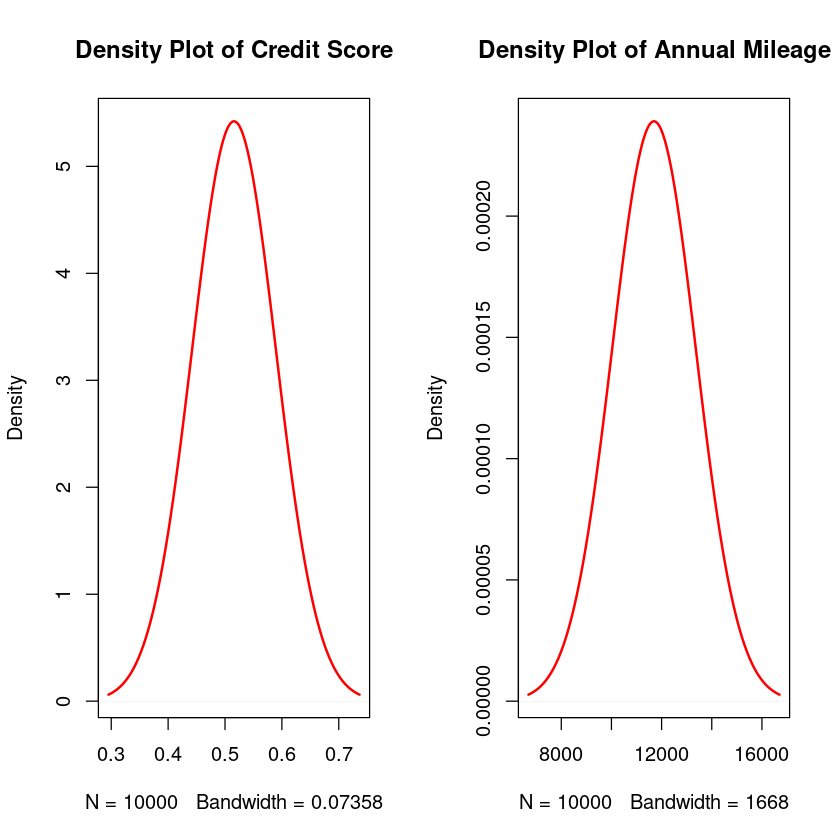

In [12]:
# Because the data are normally distributed in the columns that have missingness, we can use mean imputation through the mutate_at function.

car_insurance <- car_insurance %>% 
mutate_at(c("credit_score", "annual_mileage"), mean, na.rm = TRUE)

glimpse(car_insurance)
summary(car_insurance)

# Check the distribution of these variables again.

par(mfrow = c(1,2))
plot(density(car_insurance$credit_score, na.rm = TRUE), 
	 col = "red", 
	 lwd = 2,
	main = "Density Plot of Credit Score"
	)
plot(density(car_insurance$annual_mileage, na.rm = TRUE), 
	 col = "red", 
	 lwd = 2,
	main = "Density Plot of Annual Mileage"
	)

In [13]:
# Prepare data to build the logistic regression models.

features_df <- data.frame(features = names(car_insurance)[-c(1,19)])

accuracy <- c()

for (var in features_df$features) {
	
	model <- glm(glue('outcome ~ {var}'), data = car_insurance, family = 'binomial')
	predictions <- round(fitted(model))
	accuracy <- mean(predictions == car_insurance$outcome)
	features_df[which(features_df$feature == var), "accuracy"] <- accuracy
	
}

features_df %>% arrange(desc(accuracy))

# Find the most predictive feature for creating a logistic regression model.

best_feature_df <- features_df %>% 
filter(accuracy == max(accuracy)) %>% 
rename(best_feature = features,
	  best_accuracy = accuracy
	  )

best_feature_df


features,accuracy
<chr>,<dbl>
driving_experience,0.7771
age,0.7747
income,0.7425
vehicle_ownership,0.7351
gender,0.6867
race,0.6867
education,0.6867
credit_score,0.6867
vehicle_year,0.6867


best_feature,best_accuracy
<chr>,<dbl>
driving_experience,0.7771
